In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
fraud = pd.read_csv("Fraud_check.csv")
print(fraud.head(10))
print("Shape =", fraud.shape)

  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   
5        NO       Divorced           33329           116382                0   
6        NO       Divorced           83357            80890                8   
7       YES         Single           62774           131253                3   
8        NO         Single           83519           102481               12   
9       YES       Divorced           98152           155482                4   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  
5    NO  
6   YES  
7   YES  
8   YES  
9   YES  
Shape = (

In [3]:
fraud.T

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
Undergrad,NO,YES,NO,YES,NO,NO,NO,YES,NO,YES,...,NO,YES,YES,NO,NO,YES,YES,NO,YES,NO
Marital.Status,Single,Divorced,Married,Single,Married,Divorced,Divorced,Single,Single,Divorced,...,Married,Single,Single,Divorced,Married,Divorced,Divorced,Divorced,Married,Divorced
Taxable.Income,68833,33700,36925,50190,81002,33329,83357,62774,83519,98152,...,43018,27394,68152,84775,47364,76340,69967,47334,98592,96519
City.Population,50047,134075,160205,193264,27533,116382,80890,131253,102481,155482,...,85195,132859,75143,131963,97526,39492,55369,154058,180083,158137
Work.Experience,10,18,30,15,28,0,8,3,12,4,...,14,18,16,10,9,7,2,0,17,16
Urban,YES,YES,YES,YES,NO,NO,YES,YES,YES,YES,...,YES,YES,NO,YES,YES,YES,YES,YES,NO,NO


In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
numeric_cols = ['Taxable.Income','City.Population', 'Work.Experience']

# Calculate the correlation matrix of only the numeric columns
correlation_matrix = fraud[numeric_cols].corr()
correlation_matrix

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<Axes: >

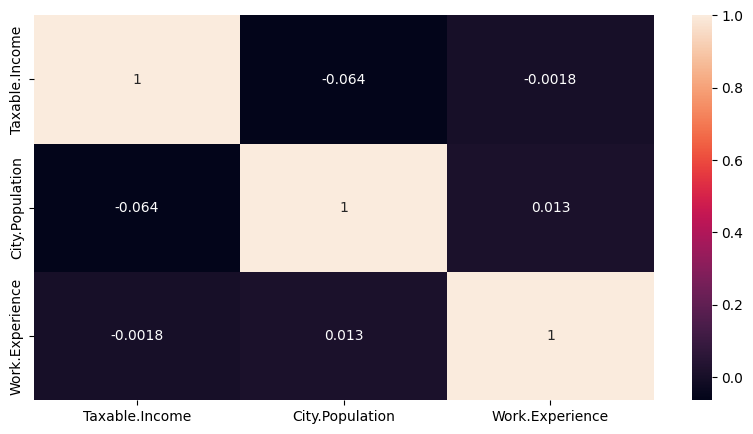

In [9]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(fraud[numeric_cols].corr(),annot=True)

In [32]:
def distplot(param):
    plt.figure(figsize=(20,15))
    sns.distplot(fraud[param], hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.show()

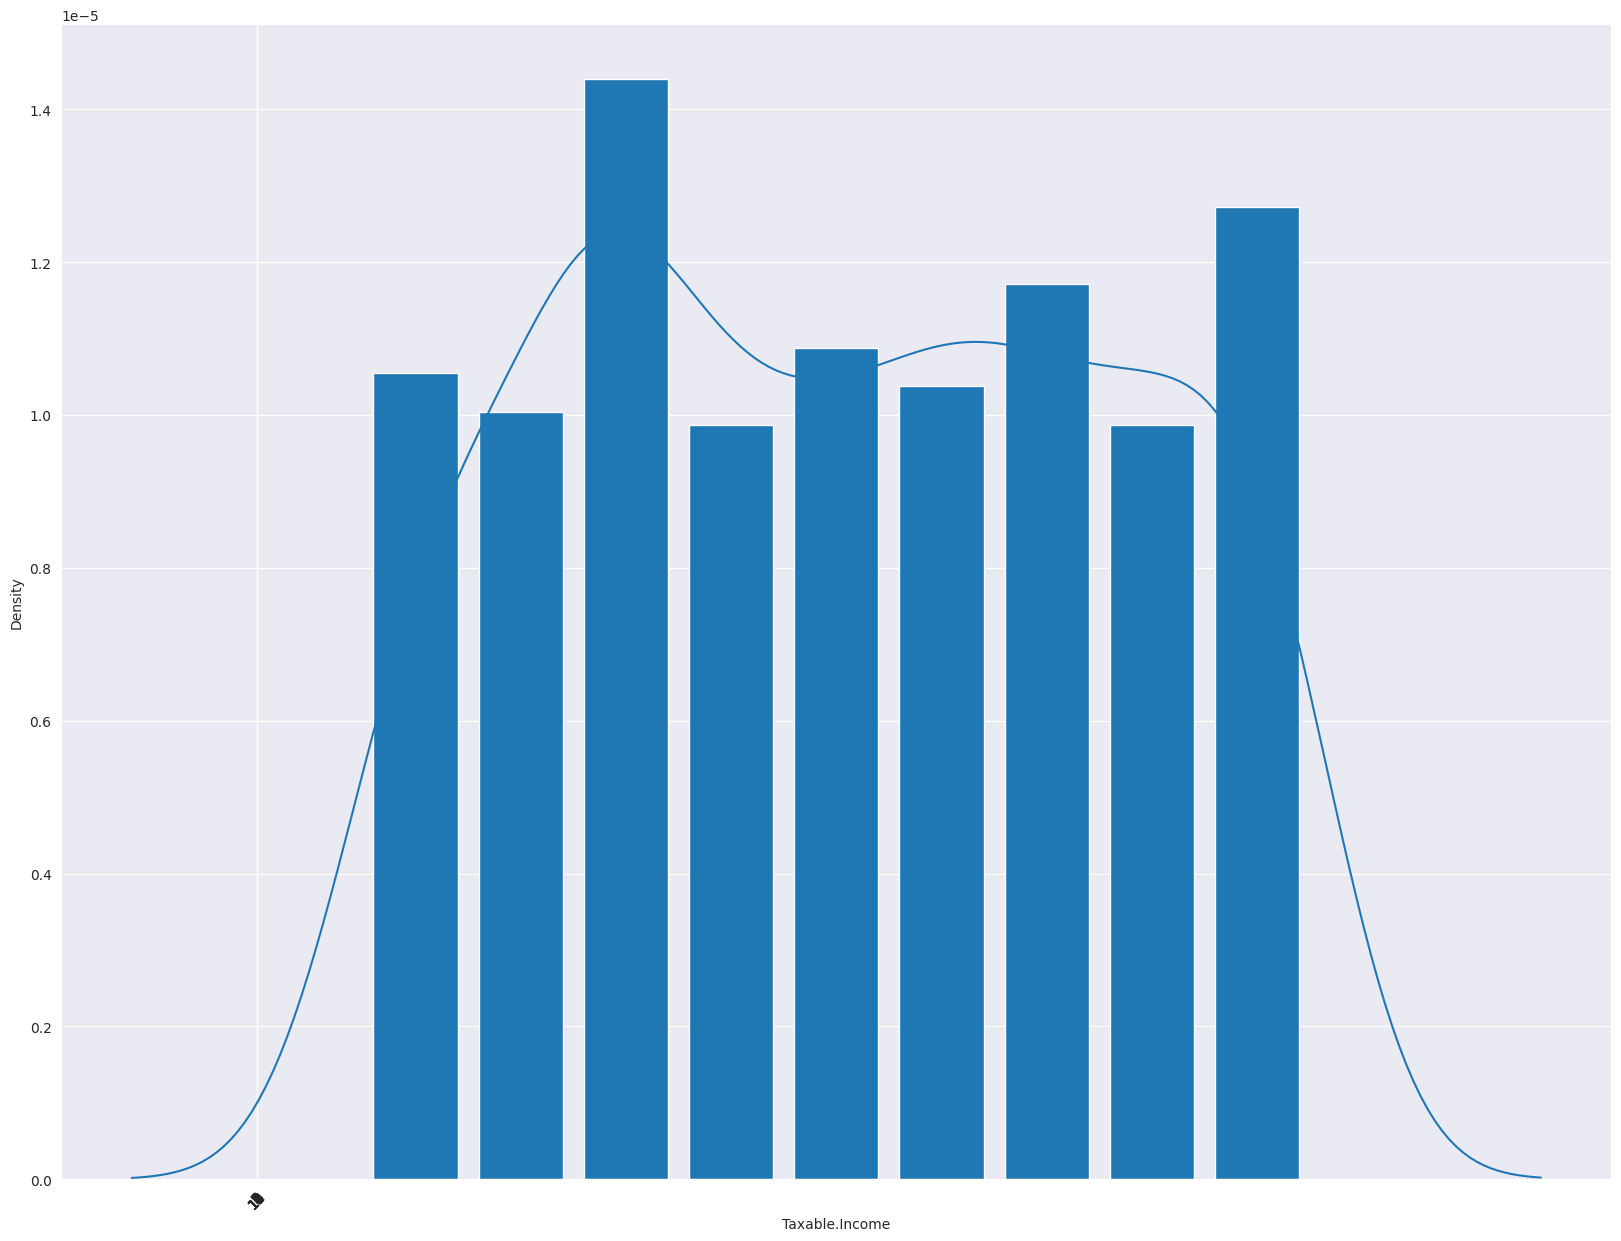

In [33]:
distplot("Taxable.Income")

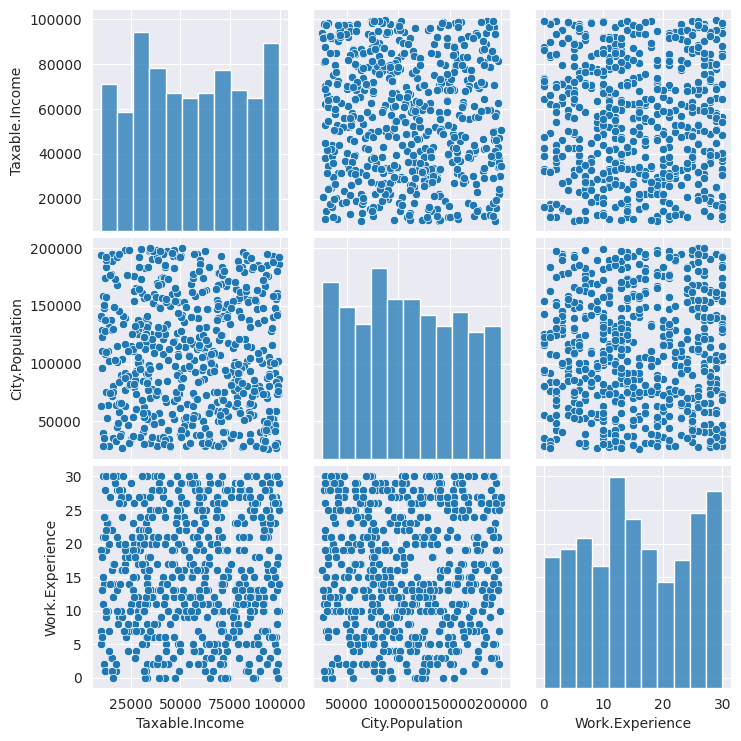

In [12]:
sns.set_style('darkgrid')
sns.pairplot(fraud)
plt.show()

<Axes: ylabel='Count'>

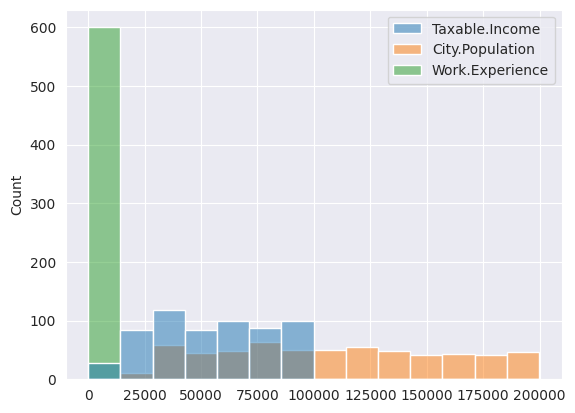

In [13]:
sns.histplot(fraud)

<Axes: >

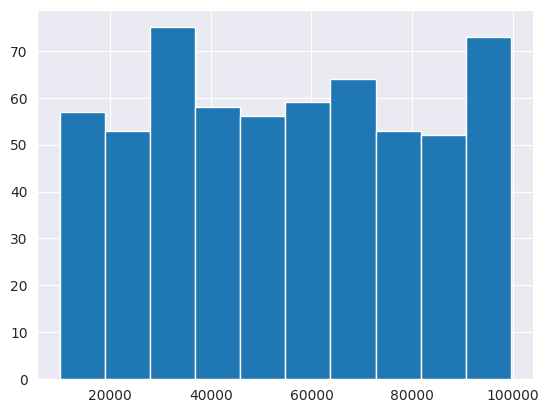

In [15]:
fraud["Taxable.Income"].hist()

# Changing the categorical variables into dummies.

In [16]:
fraud1 = pd.get_dummies(fraud)

# Converting the Target variable into Categorical

In [17]:
fraud1['Category'] = pd.cut(fraud1['Taxable.Income'],
                        bins=[0,30000, np.inf],
                        labels=['Risky','Good'],
                        include_lowest=True)
fraud1


,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Category
0,68833,50047,10,True,False,False,False,True,False,True,Good
1,33700,134075,18,False,True,True,False,False,False,True,Good
2,36925,160205,30,True,False,False,True,False,False,True,Good
3,50190,193264,15,False,True,False,False,True,False,True,Good
4,81002,27533,28,True,False,False,True,False,True,False,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,False,True,True,False,False,False,True,Good
596,69967,55369,2,False,True,True,False,False,False,True,Good
597,47334,154058,0,True,False,True,False,False,False,True,Good
598,98592,180083,17,False,True,False,True,False,True,False,Good


In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
type_ = ["Medium", "Low", "High"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=fraud['Taxable.Income'].value_counts(), name="Taxable.Income"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Fraud Data check",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Taxable.Income', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [19]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [20]:
array = fraud1.values
X = array[:,1:10]
Y = array[:,10]

In [21]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(round(results.mean()*100,2))

73.0


# Ensemble techniques
# Bagging

In [23]:
from sklearn.ensemble import BaggingClassifier

seed = 7
kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results_bag = cross_val_score(model1, X, Y, cv=kfold)
print(results_bag.mean()*100)

74.0


# Boosting
# AdaBoost Classification

In [24]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 100
seed=7
kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results_boost = cross_val_score(model2, X, Y, cv=kfold)
print(results_boost.mean()*100)

76.66666666666669


# Stacking
# Stacking Ensemble for Classification

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Iteration = 1

In [26]:
estimators = []
model3 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model3))
model4 = DecisionTreeClassifier()
estimators.append(('cart', model4))
model5 = SVC()
estimators.append(('svm', model5))
model6 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model6))
model7 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model7))

# create the ensemble modelIter
ensemble = VotingClassifier(estimators)
results3 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results3.mean()*100)

78.33333333333334


# Iteration = 2

In [27]:
estimators = []
model8 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model8))
model9 = DecisionTreeClassifier()
estimators.append(('cart', model9))
model10 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model10))
model11 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model11))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results4 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results4.mean()*100)

78.33333333333334


# Iteration = 3

In [28]:
estimators = []
model12 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model12))
model13 = DecisionTreeClassifier()
estimators.append(('cart', model13))
model14 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model14))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results5 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results5.mean()*100)

78.0


# Iteration = 4

In [29]:
estimators = []
model15 = DecisionTreeClassifier()
estimators.append(('cart', model15))
model16 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model16))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results6.mean()*100)

78.16666666666667


# Iteration = 5

In [30]:
estimators = []
model15 = DecisionTreeClassifier()
estimators.append(('logistic', model15))
model16 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model16))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results6.mean()*100)

78.16666666666667


# Iteration = 6

In [31]:
estimators = []
model17 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model17))
model18 = DecisionTreeClassifier()
estimators.append(('cart', model18))
model19 = SVC()
estimators.append(('svm', model19))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results7 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results7.mean()*100)

79.33333333333333
